# Trabajo de Juan

# A lo largo del código Yo, Gabriel Cornejo, escribo algunos comentarios y al final expongo mis comentarios.

## Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago
de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo
que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

* **Fecha-I** : Fecha y hora programada del vuelo.
* **Vlo-I** : Número de vuelo programado.
* **Ori-I** : Código de ciudad de origen programado.
* **Des-I** : Código de ciudad de destino programado.
* **Emp-I** : Código aerolínea de vuelo programado.
* **Fecha-O** : Fecha y hora de operación del vuelo.
* **Vlo-O** : Número de vuelo de operación del vuelo.
* **Ori-O** : Código de ciudad de origen de operación
* **Des-O** : Código de ciudad de destino de operación.
* **Emp-O** : Código aerolínea de vuelo operado.
* **DIA** : Día del mes de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLAORI** : Nombre ciudad origen.
* **SIGLADES** : Nombre ciudad destino.

## Desarrollo

### 0. Obtención de datos

In [ ]:
#Se importan las librerías necesarias para el problema
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msng
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [ ]:
df = pd.read_csv('dataset_SCL.csv')

In [ ]:
df.shape

(68206, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


Ver las primeras líneas del archivo

In [ ]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


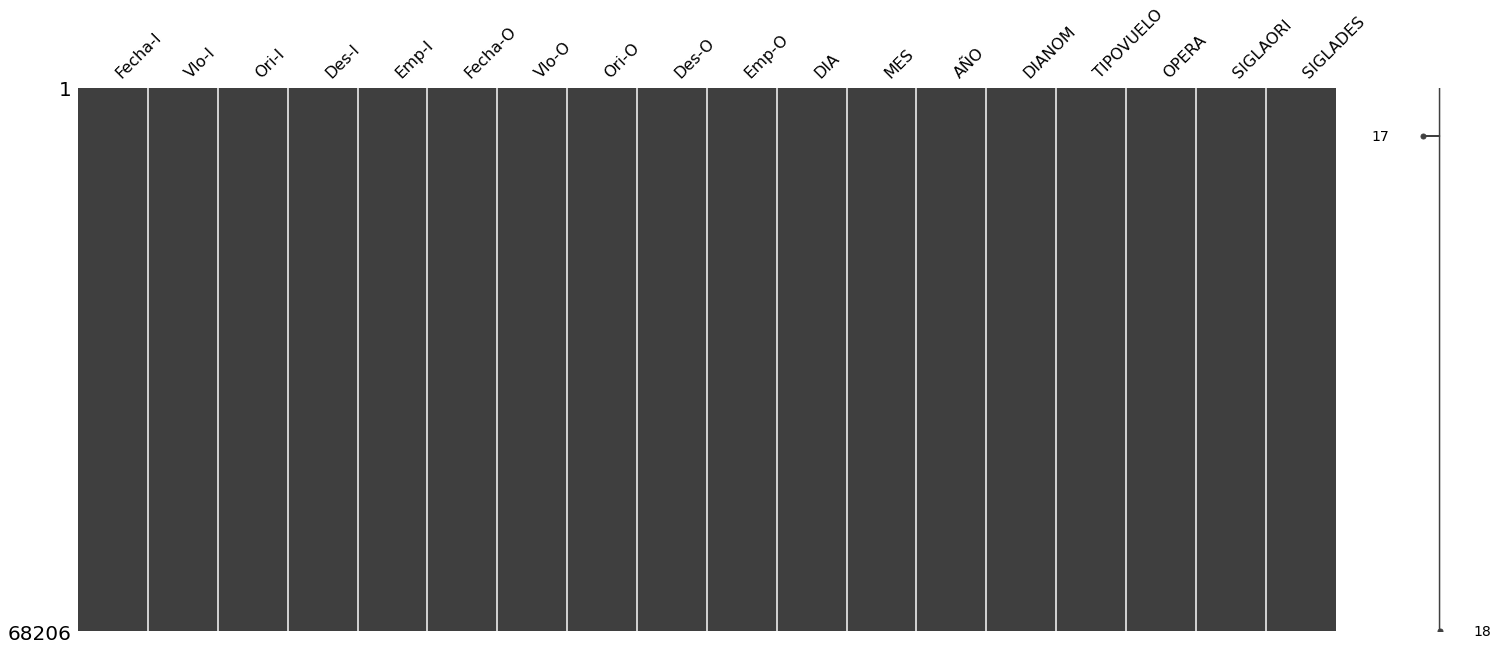

In [ ]:
msng.matrix(df)

In [ ]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

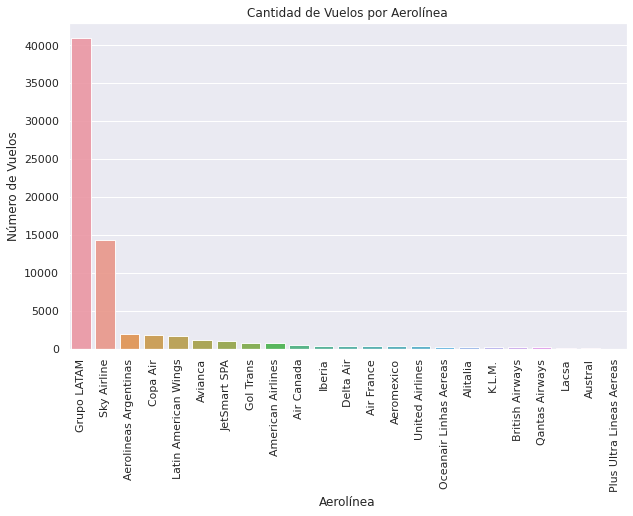

In [ ]:
vuelos_aerolineas = df['OPERA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style="darkgrid")
sns.barplot(vuelos_aerolineas.index, vuelos_aerolineas.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Aerolínea')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Aerolínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Más de la mitad de los vuelos son de LATAM. El segundo actor importante es Sky Airline

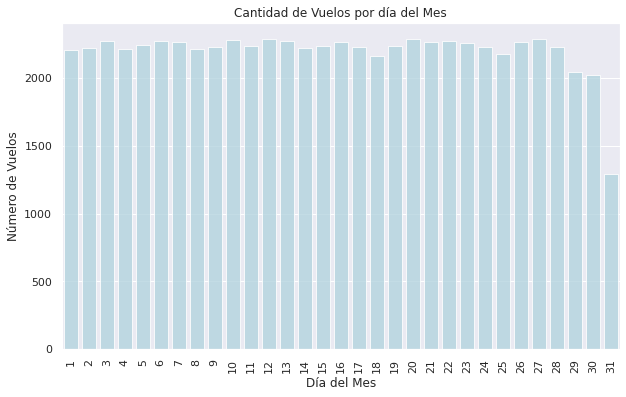

In [ ]:
vuelos_dia = df['DIA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style = "darkgrid")
sns.barplot(vuelos_dia.index, vuelos_dia.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

La distribución de cantidad de vuelos por día es más bien homogénea, rondando los 2 mil diarios, salvo a fin de mes que cae a un poco más de la mitad.

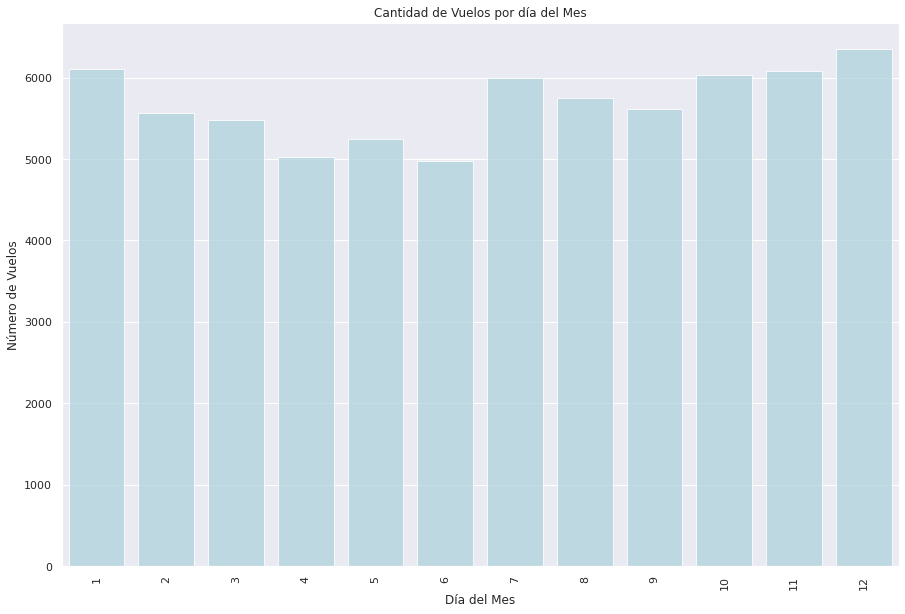

In [ ]:
vuelos_mes = df['MES'].value_counts()
sns.set(style = "darkgrid")
sns.barplot(vuelos_mes.index, vuelos_mes.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Desde julio en adelante, se aprecia un aumento en la cantidad de vuelos. Los meses con menos vuelos son abril, mayo y junio, en cambio noviembre, diciembre y enero son los más altos.

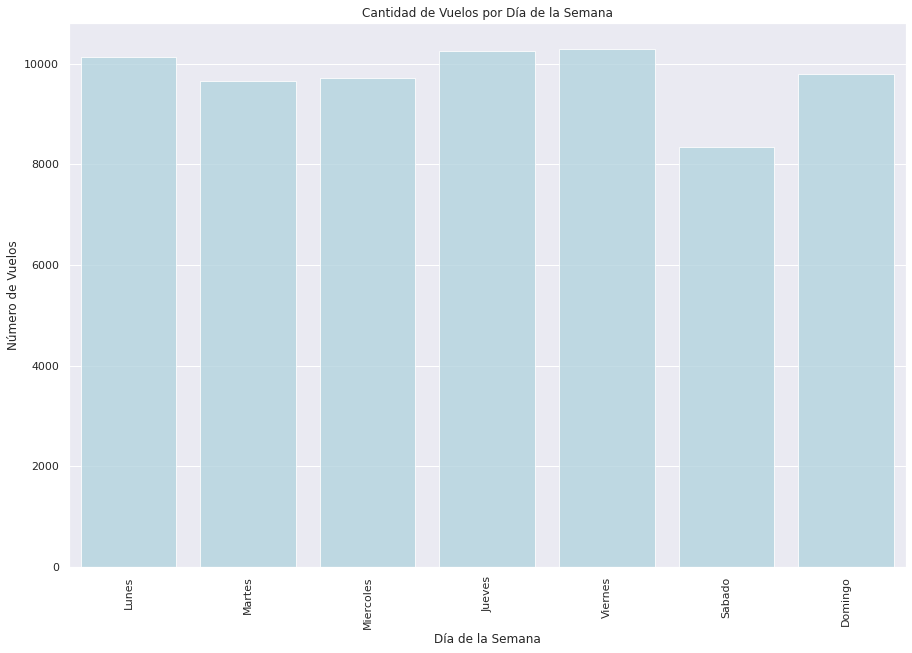

In [ ]:
vuelos = df['DIANOM'].value_counts()
dias = [vuelos.index[2], vuelos.index[5], vuelos.index[4], vuelos.index[1], vuelos.index[0], vuelos.index[6], vuelos.index[3]]
valores_dias = [vuelos.values[2], vuelos.values[5], vuelos.values[4], vuelos.values[1], vuelos.values[0], vuelos.values[6], vuelos.values[3]]

sns.set(style="darkgrid")
sns.barplot(dias, valores_dias, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Día de la Semana')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Por lo general, el día con menos vuelos es el sábado.

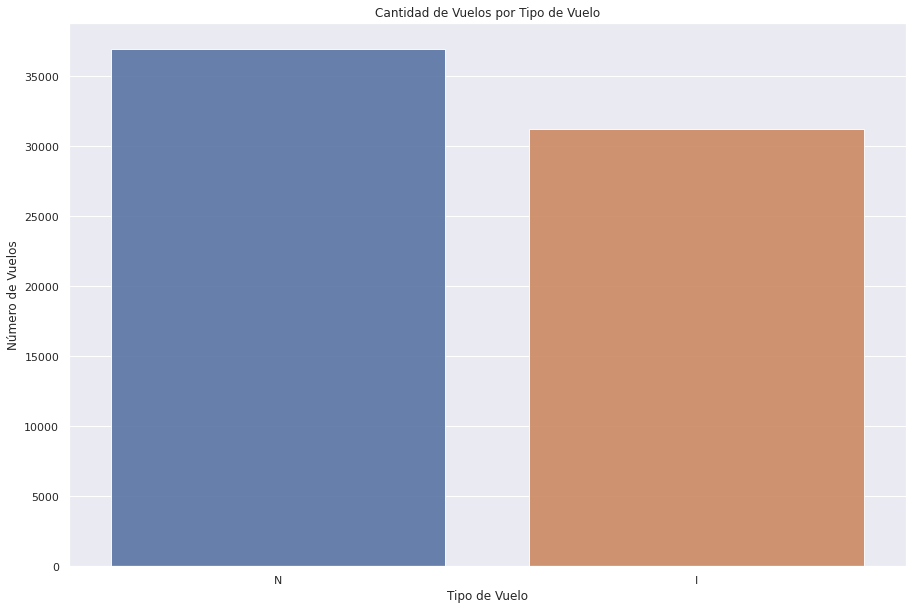

In [ ]:
vuelos = df['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
sns.barplot(vuelos.index, vuelos.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Tipo de Vuelo')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.show()

La mayoría de los vuelos son vuelos nacionales.

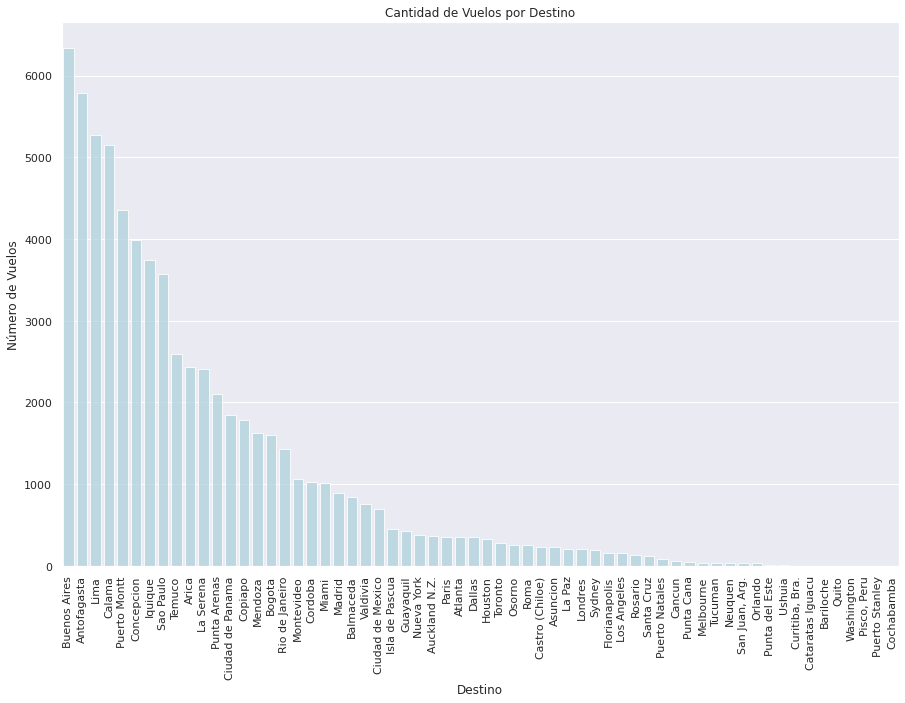

In [ ]:
vuelos = df['SIGLADES'].value_counts()
sns.set(style="darkgrid")
sns.barplot(vuelos.index, vuelos.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Destino')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)

plt.show()

Respecto a las distribuciones, se puede ver que dentro de todo la data está distribuida de manera bastante balanceada. De todas formas se pueden notar ciertas particularidades en algunas columnas: 
* En las aerolíneas LATAM Airlines es la con mayor cantidad de vuelo debido a que es la más grande aquí en chile y es la que tiene mayor cantidad de destinos. SKY Airlines sería la segunda más grande y de ahí en adelante las demás son bastante similares en cuanto a vuelos. 
* En cuanto a los días del mes, se puede ver como el día 31 tiene menor cantidad que los demás días y esto se puede deber a que hay menos días 31 durante el año.
* Con los días de semana, el día sábado es el único en el que se nota una diferencia. Aquí puede ser porque la gente prefiere ese día para quedarse en donde sea que esté y aprovecharlo en caso que esté de viaje para poder recorrer o solamente descansar.
* Por parte de los destinos se puede ver que gran parte se lo llevan las ciudades chilenas del norte. Esto puede ser por un alto flujo en minería.

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

* **temporada_alta** : 1 si **Fecha-I** está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no

In [ ]:
from datetime import datetime

def temporada_alta(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0
    

In [ ]:
df['temporada_alta'] = df['Fecha-I'].apply(temporada_alta)

In [ ]:
df['temporada_alta'].value_counts()

0    46174
1    22032
Name: temporada_alta, dtype: int64

* **dif_min** : diferencia en minutos entre **Fecha-O** y **Fecha-I** .

In [ ]:
def dif_min(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    dif_min = ((fecha_o - fecha_i).total_seconds())/60
    return dif_min
        

In [ ]:
df['dif_min'] = df.apply(dif_min, axis = 1)

* **atraso_15** : 1 si **dif_min** > 15, 0 si no.

In [ ]:
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)

In [ ]:
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

* **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a **Fecha-I**.

In [ ]:
def get_periodo_dia(fecha):
    fecha_time = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S').time()
    mañana_min = datetime.strptime("05:00", '%H:%M').time()
    mañana_max = datetime.strptime("11:59", '%H:%M').time()
    tarde_min = datetime.strptime("12:00", '%H:%M').time()
    tarde_max = datetime.strptime("18:59", '%H:%M').time()
    noche_min1 = datetime.strptime("19:00", '%H:%M').time()
    noche_max1 = datetime.strptime("23:59", '%H:%M').time()
    noche_min2 = datetime.strptime("00:00", '%H:%M').time()
    noche_max2 = datetime.strptime("4:59", '%H:%M').time()
    
    if(fecha_time > mañana_min and fecha_time < mañana_max):
        return 'mañana'
    elif(fecha_time > tarde_min and fecha_time < tarde_max):
        return 'tarde'
    elif((fecha_time > noche_min1 and fecha_time < noche_max1) or
         (fecha_time > noche_min2 and fecha_time < noche_max2)):
        return 'noche'

In [ ]:
df['periodo_dia'] = df['Fecha-I'].apply(get_periodo_dia)

Veamos las primeras líneas del dataframe "df"

In [ ]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,noche


Crear un archivo synthetic_feature en un csv

In [ ]:
df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv', index = False)

### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

* ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

In [ ]:
def calcular_tasa(df, columna):
    
    dic_atrasos = {}
    for _, row in df.iterrows():
        if row['atraso_15'] == 1:
            if row[columna] not in dic_atrasos:
                dic_atrasos[row[columna]] = 1
            else:
                dic_atrasos[row[columna]] += 1
    
    total_values = df[columna].value_counts()
    
    dic_tasas = {}
    for name, total in total_values.iteritems():
        if name in dic_atrasos:
            dic_tasas[name] = round(total / dic_atrasos[name], 2)
        else:
            dic_tasas[name] = 0
            
    return pd.DataFrame.from_dict(data = dic_tasas, orient = 'index', columns = ['Tasa (%)'])

In [ ]:
tasas_destinos = calcular_tasa(df, 'SIGLADES')
tasas_destinos

,Tasa (%)
Buenos Aires,3.91
Antofagasta,6.83
Lima,4.34
Calama,8.18
Puerto Montt,5.94
...,...
Quito,1.00
Washington,0.00
"Pisco, Peru",0.00
Puerto Stanley,1.00


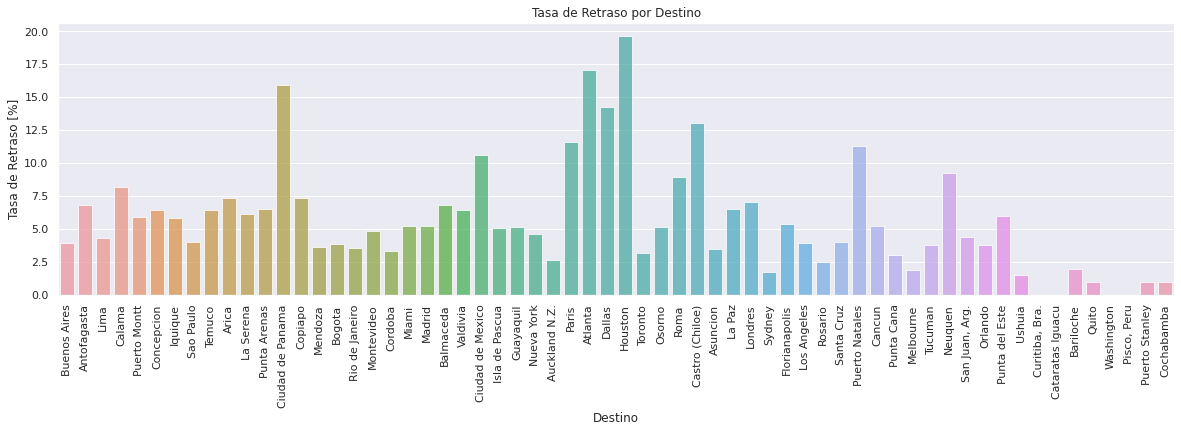

In [ ]:
tasas_destinos_values = df['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(df['SIGLADES'].value_counts().index, tasas_destinos['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Destino')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
tasas_aerolineas = calcular_tasa(df, 'OPERA')
tasas_aerolineas

,Tasa (%)
Grupo LATAM,5.60
Sky Airline,5.63
Aerolineas Argentinas,4.16
Copa Air,15.95
Latin American Wings,2.46
Avianca,3.76
JetSmart SPA,5.59
Gol Trans,2.81
American Airlines,14.84
Air Canada,2.19


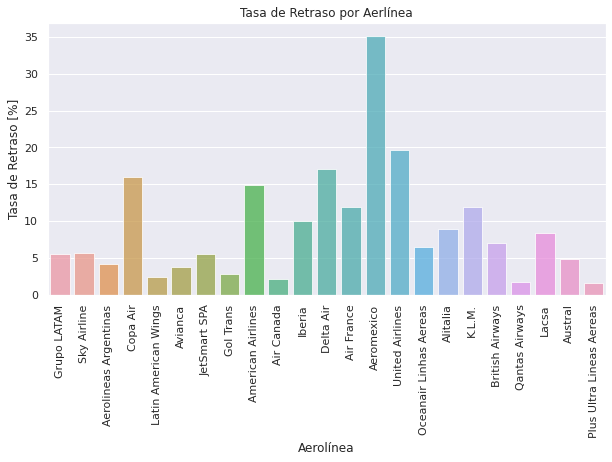

In [ ]:
tasas_aerolineas_values = df['OPERA'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(tasas_aerolineas_values, tasas_aerolineas['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Aerlínea')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Aerolínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
tasas_meses = calcular_tasa(df, 'MES')
tasas_meses

,Tasa (%)
12,3.94
1,6.25
11,5.07
10,4.43
7,3.41
8,5.77
9,5.80
2,6.60
3,8.69
5,6.34


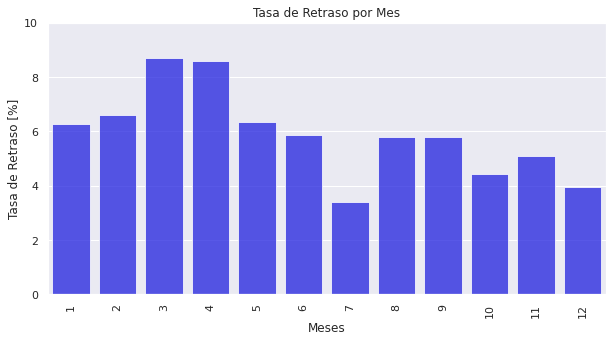

In [ ]:
tasas_meses_values = df['MES'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(tasas_meses_values, tasas_meses['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Mes')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Meses', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,10)
plt.show()

In [ ]:
tasas_dias = calcular_tasa(df, 'DIANOM')
tasas_dias

,Tasa (%)
Viernes,4.50
Jueves,5.01
Lunes,4.95
Domingo,6.21
Miercoles,5.85
Martes,5.91
Sabado,6.13


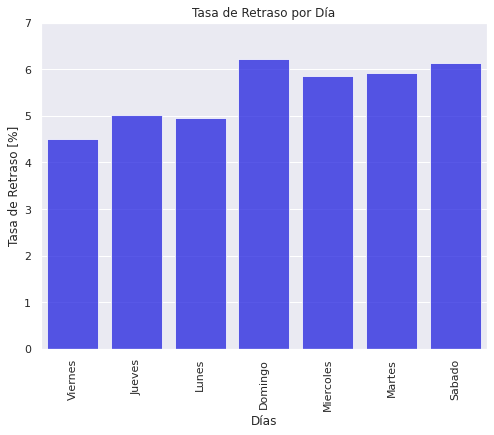

In [ ]:
tasas_dias_values = df['DIANOM'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (8,6))
sns.barplot(tasas_dias_values, tasas_dias['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Día')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Días', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,7)
plt.show()

In [ ]:
tasas_temporada = calcular_tasa(df, 'temporada_alta')
tasas_temporada

,Tasa (%)
0,5.58
1,5.08


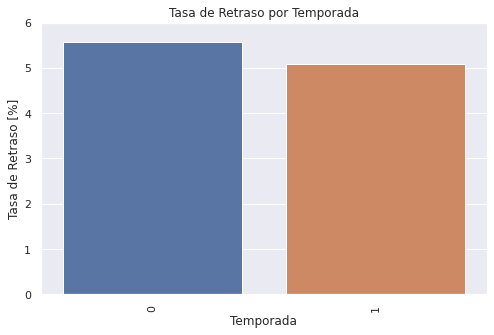

In [ ]:
tasas_temporada_values = df['temporada_alta'].value_counts().index

plt.figure(figsize = (8, 5))
sns.set(style="darkgrid")
sns.barplot(tasas_temporada_values, tasas_temporada['Tasa (%)'])
plt.title('Tasa de Retraso por Temporada')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Temporada', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,6)
plt.show()

In [ ]:
tasas_tipovuelo = calcular_tasa(df, 'TIPOVUELO')
tasas_tipovuelo

,Tasa (%)
N,6.64
I,4.43


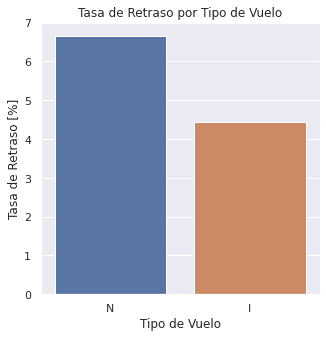

In [ ]:
tasas_tipovuelo_values = df['TIPOVUELO'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(tasas_tipovuelo_values, tasas_tipovuelo['Tasa (%)'])
plt.title('Tasa de Retraso por Tipo de Vuelo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.ylim(0,7)
plt.show()

In [ ]:
tasa_periododia = calcular_tasa(df, 'periodo_dia')
tasa_periododia

,Tasa (%)
tarde,5.06
mañana,6.21
noche,5.02


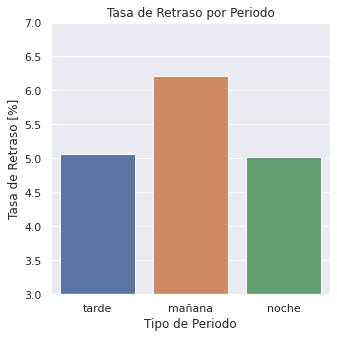

In [ ]:
tasas_periodo_values = df['periodo_dia'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(tasas_periodo_values, tasa_periododia['Tasa (%)'])
plt.title('Tasa de Retraso por Periodo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Periodo', fontsize=12)
plt.ylim(3,7)
plt.show()

* ¿Qué variables esperarías que más influyeran en predecir atrasos?

Me parece que las que más podrían influir serían:
* **Aerolíneas**: Dependiendo de la calidad de gestión de cada aerolínea puede ser que afecte en sus programaciones. También puede que afecte el tipo de aerolínea, si es una low cost por ejemplo, estas llevan menos equipaje ya que es un costo extra para cada pasajero por lo que el tiempo de carga es menor, corriendo menor riesgo de retraso. 
* **Tipo de Vuelo**: esto puede afectar en cómo esté el clima del país de destino. Por ejemplo si se tiene que volar a argentina y se tiene que cruzar por la cordillera y hay un mal clima, es posible que se tenga que esperar un rato para poder salir.
* **Mes**: Esto va un poco de la mano con lo anterior, si es que es un mes del año donde el clima no es lo suficientemente adecuado, se tendría que esperar.  
 
* **Destino**: De acuerdo al gráfico Tasa de Atraso por destino, se puede apreciar que las tasas no son homogéneas, es decir, sabiendo el destino, ya se puede predecir una cierta tasa y por lo tanto la clase 0 o 1 de atraso.

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data = shuffle(df[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'atraso_15']], random_state = 111)

Veamos las primeras líneas de data.

In [ ]:
data.head()

,OPERA,MES,TIPOVUELO,SIGLADES,DIANOM,atraso_15
13375,Sky Airline,3,N,Antofagasta,Viernes,0
35799,Grupo LATAM,7,N,Concepcion,Jueves,0
48176,Grupo LATAM,9,N,Arica,Miercoles,0
58675,Grupo LATAM,11,N,Iquique,Viernes,0
23374,Sky Airline,5,N,Valdivia,Lunes,0


In [ ]:
features = pd.concat([pd.get_dummies(data['OPERA'], prefix = 'OPERA'),pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data['MES'], prefix = 'MES')], axis = 1)
label = data['atraso_15']

In [ ]:
features.head()

,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,OPERA_Copa Air,...,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,MES_11,MES_12
13375,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
35799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
48176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
58675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23374,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
features1 = features.transpose()
print(features1)

                                13375  35799  48176  58675  23374  27666  \
OPERA_Aerolineas Argentinas         0      0      0      0      0      1   
OPERA_Aeromexico                    0      0      0      0      0      0   
OPERA_Air Canada                    0      0      0      0      0      0   
OPERA_Air France                    0      0      0      0      0      0   
OPERA_Alitalia                      0      0      0      0      0      0   
OPERA_American Airlines             0      0      0      0      0      0   
OPERA_Austral                       0      0      0      0      0      0   
OPERA_Avianca                       0      0      0      0      0      0   
OPERA_British Airways               0      0      0      0      0      0   
OPERA_Copa Air                      0      0      0      0      0      0   
OPERA_Delta Air                     0      0      0      0      0      0   
OPERA_Gol Trans                     0      0      0      0      0      0   
OPERA_Grupo 

In [ ]:
label.head()

13375    0
35799    0
48176    0
58675    0
23374    0
Name: atraso_15, dtype: int64

Se separan las muestras de entrenamiento y testing.
77% entrenamiento, 33% testing.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.33, random_state = 42)

In [ ]:
x_train.shape, x_test.shape

((45698, 37), (22508, 37))

In [ ]:
y_train.value_counts('%')

0    0.813799
1    0.186201
Name: atraso_15, dtype: float64

In [ ]:
y_test.value_counts('%')

0    0.81762
1    0.18238
Name: atraso_15, dtype: float64

#### Utilizando Regresión logística

In [ ]:
logReg = LogisticRegression()
model = logReg.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

#### Métricas Regresión Logística

In [ ]:
confusion_matrix(y_test, y_pred)

array([[18311,    92],
       [ 3985,   120]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



#### Utilizando XGBoost

In [ ]:
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
modelxgb = modelxgb.fit(x_train, y_train)

In [ ]:
y_predxgb = modelxgb.predict(x_test)

#### Métricas XGBoost

In [ ]:
confusion_matrix(y_test, y_predxgb)

array([[18403,     0],
       [ 4105,     0]])

In [ ]:
print(classification_report(y_test, y_predxgb))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.00      0.00      0.00      4105

    accuracy                           0.82     22508
   macro avg       0.41      0.50      0.45     22508
weighted avg       0.67      0.82      0.74     22508



#### Utilizando XGBoost dejando Features más importantes 

In [ ]:
modelxgb.feature_importances_

array([0.01169022, 0.        , 0.11834391, 0.        , 0.        ,
       0.06906035, 0.        , 0.        , 0.        , 0.10180492,
       0.        , 0.        , 0.00113403, 0.        , 0.00113217,
       0.        , 0.        , 0.16502443, 0.        , 0.0099514 ,
       0.0841885 , 0.00133777, 0.00850817, 0.13333023, 0.        ,
       0.        , 0.        , 0.        , 0.02873759, 0.        ,
       0.        , 0.08859436, 0.        , 0.03379858, 0.05050578,
       0.        , 0.09285755], dtype=float32)

<Figure size 936x720 with 0 Axes>

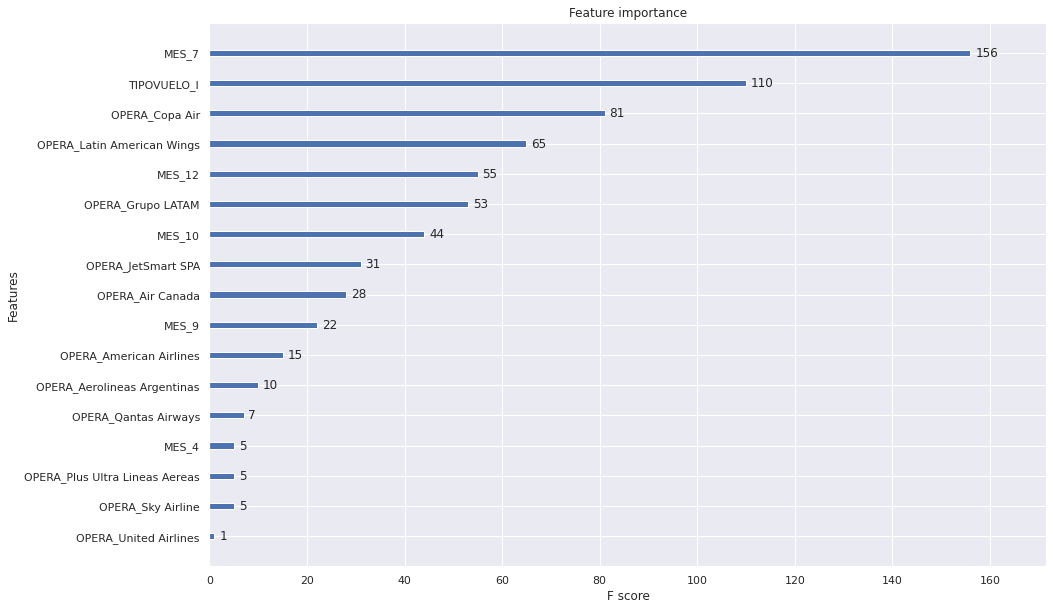

In [ ]:
plt.figure(figsize = (13,10))
plot_importance(modelxgb)

In [ ]:
features_importantes = features[['MES_7', 'TIPOVUELO_I', 'OPERA_Copa Air', 'OPERA_Latin American Wings',
                                'MES_12', 'OPERA_Grupo LATAM', 'MES_10', 'OPERA_JetSmart SPA', 'OPERA_Air Canada',
                                'MES_9', 'OPERA_American Airlines']]
labels_ = label

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features_importantes, labels_, test_size = 0.33, random_state = 42)

In [ ]:
modelxgb_f_i = xgb.XGBClassifier(random_state=1, learning_rate=0.01, subsample = 1, max_depth = 10)
modelxgb_f_i = modelxgb_f_i.fit(x_train2, y_train2)

In [ ]:
y_predxgb_f_i = modelxgb_f_i.predict(x_test2)

#### Métricas XGBoost dejando Features más importantes 

In [ ]:
confusion_matrix(y_test2, y_predxgb_f_i)

array([[18371,    32],
       [ 4044,    61]])

In [ ]:
print(classification_report(y_test2, y_predxgb_f_i))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.66      0.01      0.03      4105

    accuracy                           0.82     22508
   macro avg       0.74      0.51      0.46     22508
weighted avg       0.79      0.82      0.74     22508



### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

Los modelos utilizados en la sección anterior fueron:
* **Regresión Logística**: Fue seleccionado ya que es el modelo más simple para poder resolver problemas de clasificación.
* **XGBoost**: Fue seleccionado porque en general tiene un gran desempeño y entrega buenos resultados ya sea para regresión y clasificación, además es bastante rápido y facilita el tuneo de hiperparámetros.

Los resultados obtenidos con ambos modelos fueron muy malos. Se utilizó matriz de confusión para validar los resultados. La cantidad de falsos negativos fue muy alta. Una de las posibles razones, la más clara, es el desbalanceo que existe en la clase 'atraso_15'. Del total de datos un 82% corresponde a no atraso y el 18% restante a atraso.
Para poder mejorar la performance se tomaron dos decisiones, la primera aplicar un Grid Search CV sobre XGBoost para tunear de mejor manera los hiperparámetros y la segunda realizar un upsampling de la clase desbalanceada, en este caso los atrasos.



### Grid Search CV sobre Modelo XG Boost con los mejores features

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
                'learning_rate': [0.01,0.05, 0.1],
                'n_estimators': [50, 100, 150],
                'subsample': [0.5, 0.9]
}

modelxgb_f_i_GridCV = GridSearchCV(modelxgb_f_i, param_grid = parameters,
    cv = 2, n_jobs=-1, verbose=1).fit(x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


In [ ]:
y_predxgb_f_i_grid = modelxgb_f_i_GridCV.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_predxgb_f_i_grid)

array([[18287,   116],
       [ 3933,   172]])

In [ ]:
print(classification_report(y_test, y_predxgb_f_i_grid))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     18403
           1       0.60      0.04      0.08      4105

    accuracy                           0.82     22508
   macro avg       0.71      0.52      0.49     22508
weighted avg       0.78      0.82      0.75     22508



Luego de hacer el grid para XGB, precision para Retraso es un 62% y la Sensibilidad un 9%:

In [ ]:
modelxgb_f_i_GridCV.score(x_test, y_test)

0.8201084059001243

### Upsampling

In [ ]:
data['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [ ]:
#Resample
from sklearn.utils import resample

data_no_retraso = data[data['atraso_15'] == 0]
data_atraso = data[data['atraso_15'] == 1]

data_atraso_upsampled = resample(data_atraso, 
                                 replace = True,     # sample with replacement
                                 n_samples = 30000,    # to match majority class
                                 random_state = 42) # reproducible results

data_upsampled = pd.concat([data_no_retraso, data_atraso_upsampled])

In [ ]:
data_upsampled['atraso_15'].value_counts()

0    55592
1    30000
Name: atraso_15, dtype: int64

In [ ]:
features_upsampled = pd.concat([pd.get_dummies(data_upsampled['OPERA'], prefix = 'OPERA'),pd.get_dummies(data_upsampled['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data_upsampled['MES'], prefix = 'MES')], axis = 1)
label_upsampled = data_upsampled['atraso_15']

In [ ]:
x_upsampled_train, x_upsampled_test, y_upsampled_train, y_upsampled_test = train_test_split(features_upsampled, label_upsampled, test_size = 0.33, random_state = 42)

In [ ]:
modelxgb_up = xgb.XGBClassifier(random_state=1, learning_rate=0.01, subsample = 1, max_depth = 10)
modelxgb_up.fit(x_upsampled_train, y_upsampled_train)

XGBClassifier(learning_rate=0.01, max_depth=10, random_state=1)

In [ ]:
y_upsampled_predxgb = modelxgb_up.predict(x_upsampled_test)

In [ ]:
confusion_matrix(y_upsampled_test, y_upsampled_predxgb)

array([[17156,  1193],
       [ 7969,  1928]])

In [ ]:
print(classification_report(y_upsampled_test, y_upsampled_predxgb))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79     18349
           1       0.62      0.19      0.30      9897

    accuracy                           0.68     28246
   macro avg       0.65      0.56      0.54     28246
weighted avg       0.66      0.68      0.62     28246



La precision par la clase atraso ahora es 62% y la Sensibilidad 19%

In [ ]:
modelxgb_up.score(x_upsampled_test, y_upsampled_test)

0.6756354882107201

Observando los dos métodos para incrementar la performance, se puede ver como el modelo no mejoró. Esto puede ser ya que la data creada al upsamplear no tiene ningún sentido. Si se pudiese pudiese balancear la clase tal vez los modelos tendrían un mejor desempeño.
texto en negrita
No estoy de acuerdo con estas afirmaciones. El modelo con el upsampling mejora la performance.

#### Observaciones al trabajo del Data Scientist

Me han llamado la atención las siguientes situaciones

* **1)** No entiendo por qué se crearon variables como Periodo Dia del vuelo, el día del vuelo, para luego crear un archivo aparte y no utilizarlas en los modelos.
* **2)** En la regresión logística, al crear las varibles dicotomizadas (one-hot-encoding) no se pide que se "bote" la primera clase para de esta manera evitar la trampa de las variables dummies, que altera los resultados de los regresores tanto en los modelos de regresión como en los logísticos.
* **3)** Efectivamente, los modelos presentados en un principio son deficientes. Por lo general tienen una alta Accuracy, pero son muy malos para detectar la clase 1, que es el fenómeno "atraso" que es la estrella en esta película. Incluso el XGB inicial clasifica a todos los vuelos como "No atraso". Tanto la regresión logística como el XGB Best logran una Sensitivity del 60%, sin embargo la Precision para la clase 1 es muy baja, la máxima que se alcanza con el Grid Search es de un 4%, es decir que el 4% de los vuelos que el modelo señala como atrasados, realmente fueron atrasados, por lo que la cantidad de falsos positivos es altísima.
* **4)** En términos generales, el mejor modelo es el XGB en el cual se aplica la técnica de Upsampling. A pesar de bajar la Accuracy del modelo a un 68%, tiene una Sensitivity del 62% y un importante aumento de la Precision de la clase 1 a un 19%. Recuérdese que en los modelos anteriores, esta última era un 4%.